# Problem 2 : Partitionning the Bus Fleet

In part 1, you were able to solve the simple MaxCut problem. Let's spice things up a bit by taking more information into account!

## Problem Statement
> The STS wishes to add 5 buses each serving a different line, to accomodate the growing need felt by users for the morning departures of 08:00 am and 08:30. Given that some bus lines intersect, we want to organize the buses into 2 groups. Ideally, we want the buses serving the same stops to depart at different times as much as possible.

### Supplementary Information
In this problem, all bus line intertsections are not equal.
An **intersecting weight** is specified, corresponding to the number of common edges between two bus lines. This translates the fact that some bus lines have more stops in common than other and thus, partionning them into different groups takes priority.

The following table summarizes the intersection weights for each bus line (i.e. the number of edges in common between each pair of bus lines):

<p align="center">
<img src="figures/table_prob2_ENG.png" alt="prob2" width="500"/>
</p>

**A larger weight** means that two bus lines shares a higher number of edges.

## Goal
Your goal is to **minimize the sum of intersection weights** in each departure group. In other words, you want to divide the departure lines sharing many stops.

### How : You need to
- encode the problem into a `SparsePauliOp` Hamiltonian
- optimize the parameters of your QAOA circuit
- select a good set of hyperparameters (number of layers, optimizer, ...)

#### Evaluation : You must
- Show a mentor that you were able to run your code correctly (showing cell outputs is sufficient)
- Show the optimal solutions you identified for this problem

In [3]:
from qiskit.quantum_info import SparsePauliOp

# Define the non-zero weights between qubits (i<j):
edges = {
    (0, 1): 10, (0, 3): 11, (0, 4): 13,
    (1, 2): 11, (1, 4): 10,
    (2, 3):  8,
}

pauli_strings = []
coeffs = []
n = 5  # number of buses

for (i, j), w in edges.items():
    # build a length-n string of I’s with Z at positions i and j
    pauli = ['I'] * n
    pauli[i] = 'Z'
    pauli[j] = 'Z'
    pauli_strings.append(''.join(pauli))
    coeffs.append(w)

# Construct the operator
op = SparsePauliOp(pauli_strings, coeffs)

print(op)


SparsePauliOp(['ZZIII', 'ZIIZI', 'ZIIIZ', 'IZZII', 'IZIIZ', 'IIZZI'],
              coeffs=[10.+0.j, 11.+0.j, 13.+0.j, 11.+0.j, 10.+0.j,  8.+0.j])


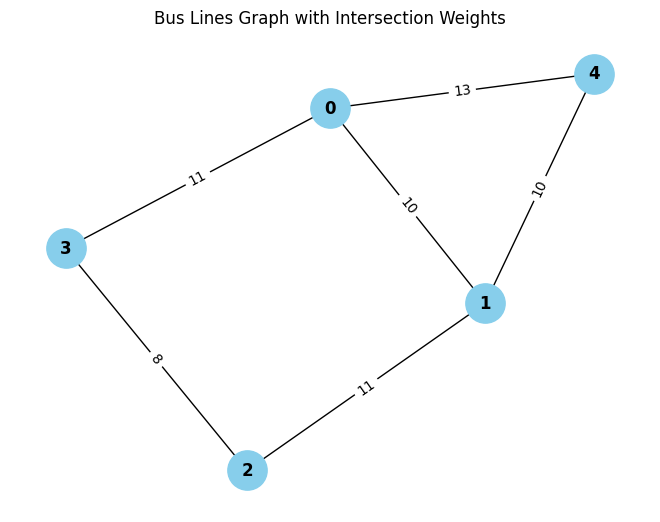

In [4]:
import networkx as nx

import matplotlib.pyplot as plt

# Build the graph
G = nx.Graph()
G.add_nodes_from(range(5))  # 'n' is defined in cell index 1

for (u, v), w in edges.items():
    G.add_edge(u, v, weight=w)

# Set the layout for a better visual
pos = nx.spring_layout(G, seed=42)

# Draw nodes and labels
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Bus Lines Graph with Intersection Weights")
plt.show()